In [1]:
import mysql.connector
import settings
import time
import numpy as np
from astropy.stats import LombScargle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
msl = mysql.connector.connect(
    user=settings.DB_USER, 
    password=settings.DB_PASS, 
    host=settings.DB_HOST, database='ztf')
cursor = msl.cursor(buffered=True, dictionary=True)
cursor2 = msl.cursor(buffered=True, dictionary=True)

In [3]:
def fetch_lomb_scargle(objectId):
    colors = ['g', 'r']
#    print('https://lasair.roe.ac.uk/object/%s/' % objectId)
    query = 'SELECT jd, magpsf, fid FROM candidates WHERE objectId="%s"' % objectId
    t = time.time()
    cursor2.execute(query)

    magpsf = [[],[]]
    jd     = [[],[]]
    for candidate in cursor2:
        fid0 = candidate['fid']-1
        jd[fid0]    .append(candidate['jd'])
        magpsf[fid0].append(candidate['magpsf'])
    lightcurve = {'jd':jd, 'magpsf':magpsf}
    return lightcurve

In [4]:
def make_lomb_scargle(lightcurve, objectId):
    colors = ['g', 'r']
    jd = lightcurve['jd']
    magpsf = lightcurve['magpsf']
    for fid0 in range(2):
        if len(jd[fid0]) > 10:
            frequency, power = LombScargle(np.array(jd[fid0]), np.array(magpsf[fid0])).autopower(nyquist_factor=2)
        plt.plot(frequency, power, color=colors[fid0])
    plt.xlabel("inverse days")
    plt.ylabel("power")
    plt.title("Periodogram for %s" % objectId)
    plt.show()

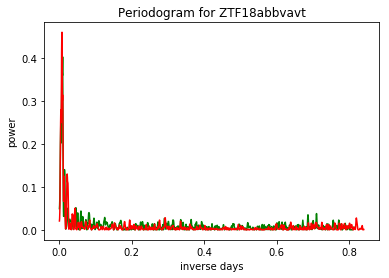

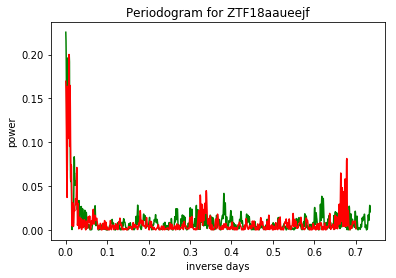

Fetch run fetch run
Compute time =    0.46
Fetch time   =    0.18


In [5]:
query = 'SELECT objectId, ncand FROM objects ORDER BY ncand DESC LIMIT 2'
cursor.execute(query)
t_compute = 0.0
t_fetch = 0.0
for row in cursor:
    t = time.time()
    lightcurve= fetch_lomb_scargle(row['objectId'])
    t_fetch += (time.time() - t)
    t = time.time()
    make_lomb_scargle(lightcurve, row['objectId'])
    t_compute += (time.time() - t)

print("Fetch run fetch run")
print("Compute time = %7.2f" % t_compute)
print("Fetch time   = %7.2f" % t_fetch)